In [120]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [121]:
C = 1e-7 # mu0/(4 pi)
I = 1 # current

def b_field(r, dr, P):
    d = P - r[:-1]
    nd = np.linalg.norm(d, axis=1)

    v = np.cross(dr, d)

    dB = C*I / nd[:, np.newaxis]**3 * v
    return dB.sum(axis=0)


In [142]:
a = 1 # loop radius
n = 10 # number of turns
L = 10 # width per turn

In [143]:
N = 100000 # number of segment
dph = n * 2*np.pi/N
dL = L/N

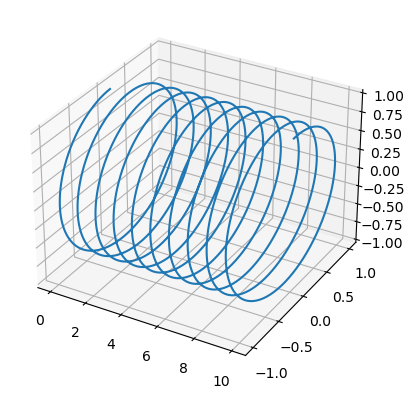

In [144]:
r = np.array([[i*dL, -a*np.sin(i*dph), a*np.cos(i*dph)] for i in range(N+1)])
dr = np.diff(r, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(r[:, 0], r[:, 1], r[:, 2])
plt.show()

In [145]:
P = np.array([L/2, 0, 0])

b_field(r, dr, P)

array([1.23223394e-06, 9.52000461e-10, 2.28591463e-12])

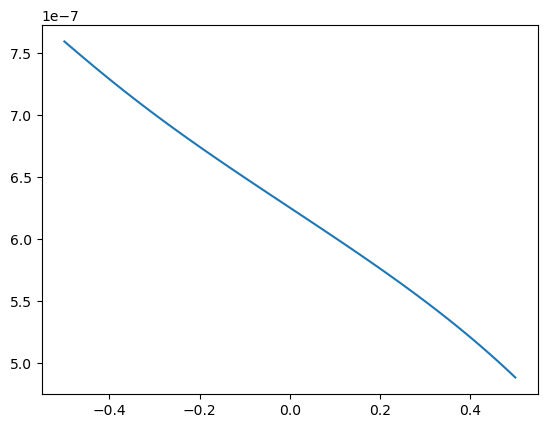

In [152]:
N_points = 100
xmin = -a/2
xmax = +a/2
Bx = np.zeros(N_points)
x = np.linspace(xmin, xmax, N_points)

for i in range(N_points):
    Bx[[i]] = b_field(r, dr, np.array([0, x[i], 0]))[[0]]

plt.plot(x, Bx)
plt.show()

In [106]:
L = 2*np.pi*a*np.array([0, 1, 0])
F = I * np.cross(L, b_field(r, dr, P))
F

array([ 7.18365673e-07,  0.00000000e+00, -6.06222068e-07])